import module

In [21]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import imageio
import matplotlib.pyplot as plt

import numpy as np

In [22]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

準備訓練資料


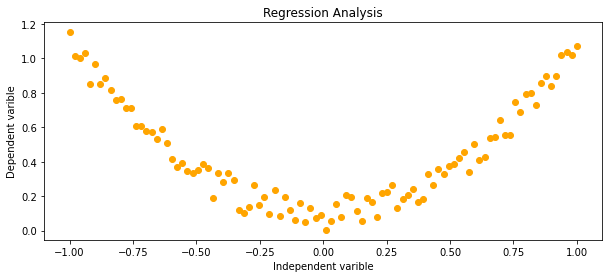

In [23]:
torch.manual_seed(1)  # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2 * torch.rand(x.size())  # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10, 4))
plt.scatter(x.data.numpy(), y.data.numpy(), color="orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

建立模型


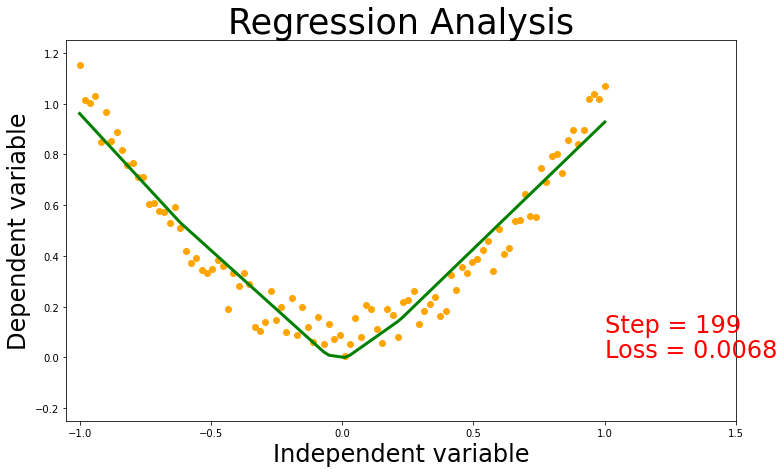

In [26]:
class Net(torch.nn.Module):
  def __init__(self, n_feature, n_hidden, n_output):
    super(Net, self).__init__()
    self.hidden = torch.nn.Linear(n_feature, n_hidden)  # hidden layer
    self.predict = torch.nn.Linear(n_hidden, n_output)  # output layer

  def forward(self, x):
    x = F.relu(self.hidden(x))  # activation function for hidden layer
    x = self.predict(x)  # linear output
    return x


net = Net(n_feature=1, n_hidden=10, n_output=1)  # define the network
net.to(device)
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12, 7))
# train the network
for t in range(200):
  x = x.to(device)
  y = y.to(device)
  prediction = net(x)  # input x and predict based on x

  loss = loss_func(prediction, y)  # must be (1. nn output, 2. target)

  optimizer.zero_grad()  # clear gradients for next train
  loss.backward()  # backpropagation, compute gradients
  optimizer.step()  # apply gradients

  # plot and show learning process
  plt.cla()
  ax.set_title('Regression Analysis', fontsize=35)
  ax.set_xlabel('Independent variable', fontsize=24)
  ax.set_ylabel('Dependent variable', fontsize=24)
  ax.set_xlim(-1.05, 1.5)
  ax.set_ylim(-0.25, 1.25)
  ax.scatter(x.cpu().data.numpy(), y.cpu().data.numpy(), color="orange")
  ax.plot(x.cpu().data.numpy(), prediction.cpu().data.numpy(), 'g-', lw=3)
  ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color': 'red'})
  ax.text(1.0, 0, 'Loss = %.4f' % loss.cpu().data.numpy(),
          fontdict={'size': 24, 'color': 'red'})

  # Used to return the plot as an image array
  fig.canvas.draw()  # draw the canvas, cache the renderer
  image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
  image = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

  my_images.append(image)

# save images as a gif
imageio.mimsave('./curve_1.gif', my_images, fps=10)